## Init and import modules 

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [18, 9]


## Load data

###  true heights

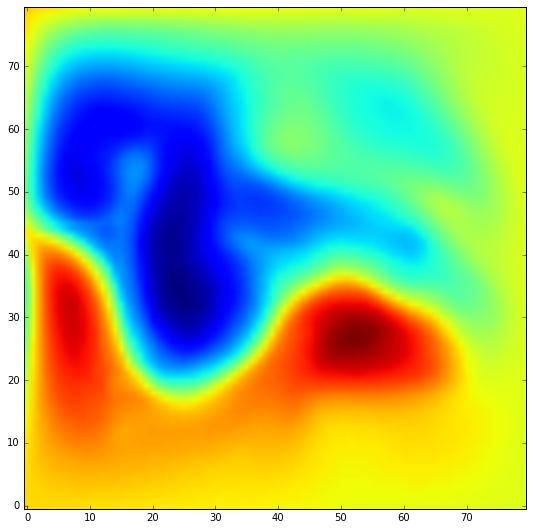

In [5]:
fname = 'state_true.nc'
fh = Dataset(fname, mode='r')
hfilt = fh.variables['Hfil'][:,:,:]
fh.close()
t=100
plt.imshow(hfilt[t,:,:])
plt.gca().invert_yaxis()
plt.show()

### true velocities

In [13]:
fname = 'state_true.nc'
fh = Dataset(fname, mode='r')
uphyt = fh.variables['Uphy'][:,:,:]
vphyt = fh.variables['Vphy'][:,:,:]
fh.close()
#t=1
#plt.imshow(uphyt[t,:,:])
#plt.colorbar()
#plt.show()


## Init des termes (balanced) de vitesse

In [6]:
%%latex
En linéarisant l'équation shallow-water et en négligeant le terme de diffusion, on obtient :

\begin{eqnarray}
g^*.\partial_x h - \frac{\tau_x}{\rho_0(H+h)} & = & + f.v   - \gamma . u \nonumber \\
g^*.\partial_y h - \frac{\tau_y}{\rho_0(H+h)} & = & - f.u   - \gamma . v \nonumber  \label{eq-cs}\\
\end{eqnarray}

On note $A_x = g^*.\partial_x h - \frac{\tau_x}{\rho_0(H+h)}$ et
$A_y = g^*.\partial_y h - \frac{\tau_y}{\rho_0(H+h)}$

On a alors la solution suivante :
\begin{eqnarray}
u & = & - \frac{\gamma A_x + f A_y}{\gamma^2 + f^2} \nonumber \\
v & = & + \frac{f A_x - \gamma A_y}{\gamma^2 + f^2} \label{sol-eq}\\
\end{eqnarray}

<IPython.core.display.Latex object>

### En négligeant la dissipation

In [10]:
fname = 'state_balanced0.nc'
fh = Dataset(fname, mode='r')
hfilb0 = fh.variables['Hfil'][:,:,:]
uphyb0 = fh.variables['Uphy'][:,:,:]
vphyb0 = fh.variables['Vphy'][:,:,:]

fh.close()
#t=1000
#plt.imshow(hfilb[t,:,:])
#plt.gca().invert_yaxis()
#plt.show()

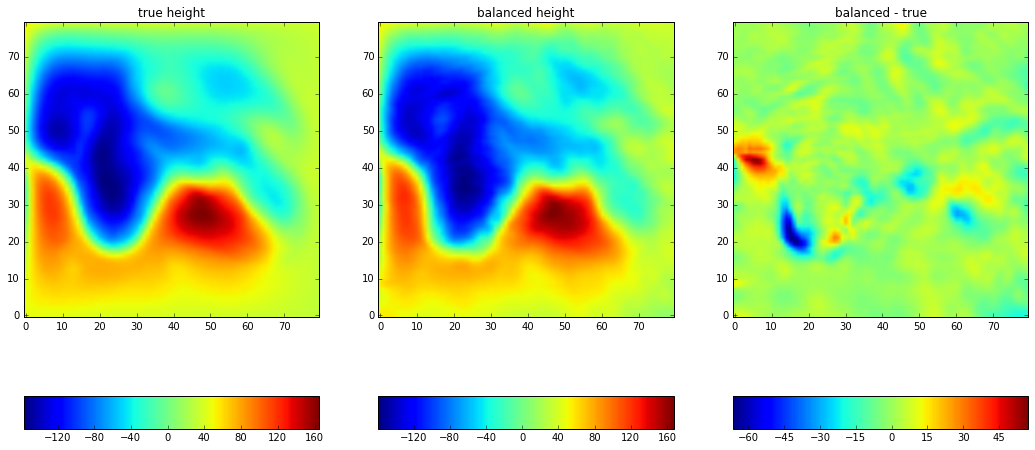

In [11]:
nfig =3
t=1000
im=range(0,nfig)
titres=['true height','balanced height','balanced - true']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(hfilt[t,:,:])
im[1] = ax[1].imshow(hfilb0[t,:,:])
im[2] = ax[2].imshow(hfilb0[t,:,:]-hfilt[t,:,:])
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
plt.show()
fig.savefig('./fig/height_bal0_true.png')



In [ ]:
SZ=np.shape(hfilt)
YA2 = SZ[1]
y0 = YA2/2
pcor = 3.5e-5
dy = 20000
beta = 2.11e-11
fcor = [pcor + beta*dy*(iy-y0) for iy in range(0,YA2)]
grav = 0.02

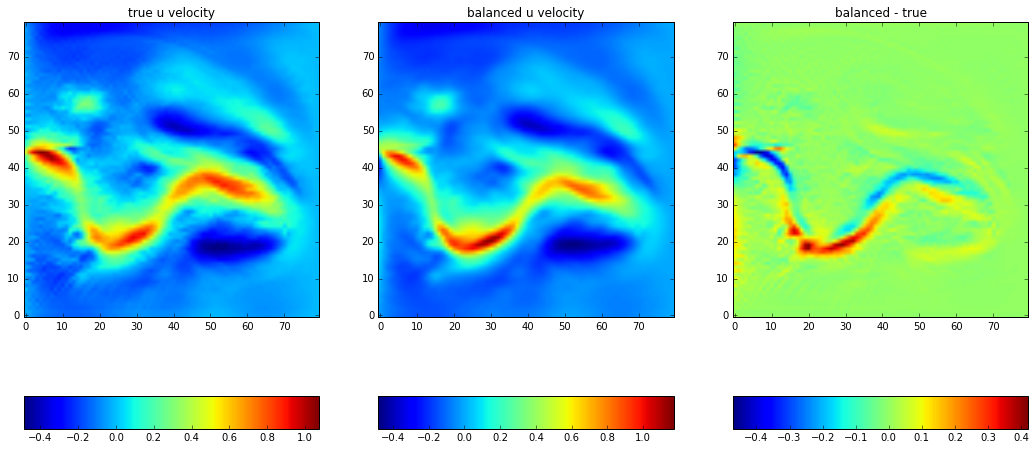

In [19]:
nfig =3
t=1
im=range(0,nfig)
titres=['true u velocity','balanced u velocity','balanced - true']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(uphyt[t,:,:])
im[1] = ax[1].imshow(uphyb0[t,:,:])
im[2] = ax[2].imshow((uphyb0[t,:,:]-uphyt[t,:,:]))
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
#im[2].set_clim(-0.5,0.5)
plt.show()
fig.savefig('./fig/u_bal0_true.png')



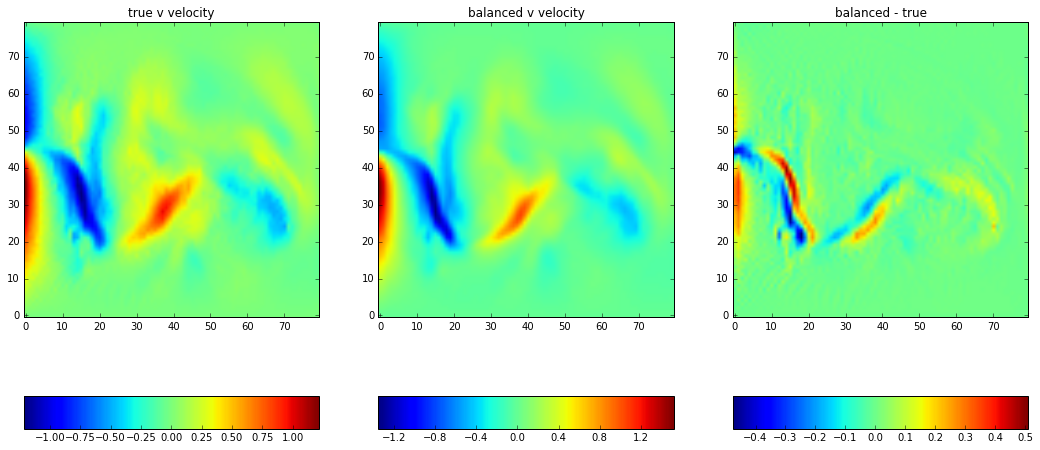

In [20]:
nfig =3
t=1
im=range(0,nfig)
titres=['true v velocity','balanced v velocity','balanced - true']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(vphyt[t,:,:])
im[1] = ax[1].imshow(vphyb0[t,:,:])
im[2] = ax[2].imshow(vphyb0[t,:,:]-vphyt[t,:,:])
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
plt.show()
fig.savefig('./fig/v_bal0_true.png')




### En prenant en compte la dissipation

In [27]:
fname = 'state_balanced.nc'
fh = Dataset(fname, mode='r')
hfilb = fh.variables['Hfil'][:,:,:]
uphyb = fh.variables['Uphy'][:,:,:]
vphyb = fh.variables['Vphy'][:,:,:]

fh.close()
#t=1000
#plt.imshow(hfilb[t,:,:])
#plt.gca().invert_yaxis()
#plt.show()

In [38]:
print hfilb[-1,10,1]
print hfilb.shape


44.0746547571
(1462, 80, 80)


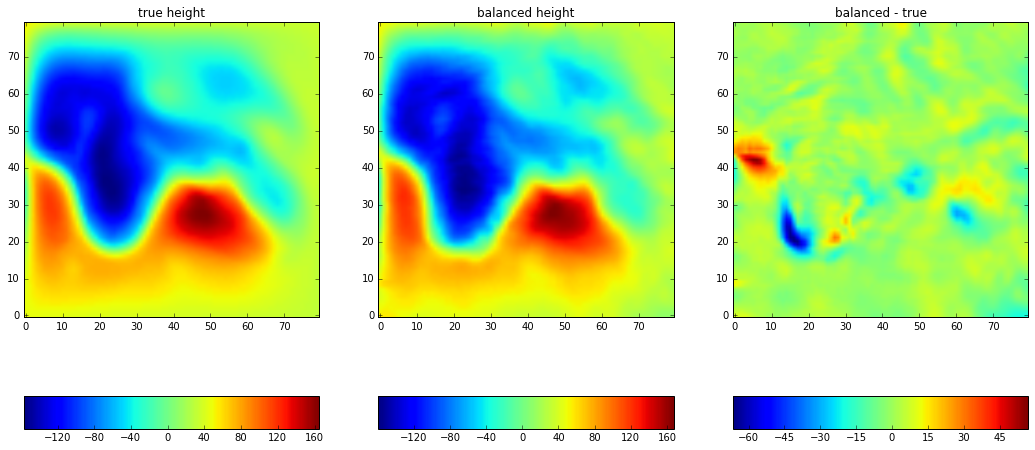

In [22]:
nfig =3
t=1000
im=range(0,nfig)
titres=['true height','balanced height','balanced - true']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(hfilt[t,:,:])
im[1] = ax[1].imshow(hfilb[t,:,:])
im[2] = ax[2].imshow(hfilb[t,:,:]-hfilt[t,:,:])
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
plt.show()
fig.savefig('./fig/height_bal_true.png')



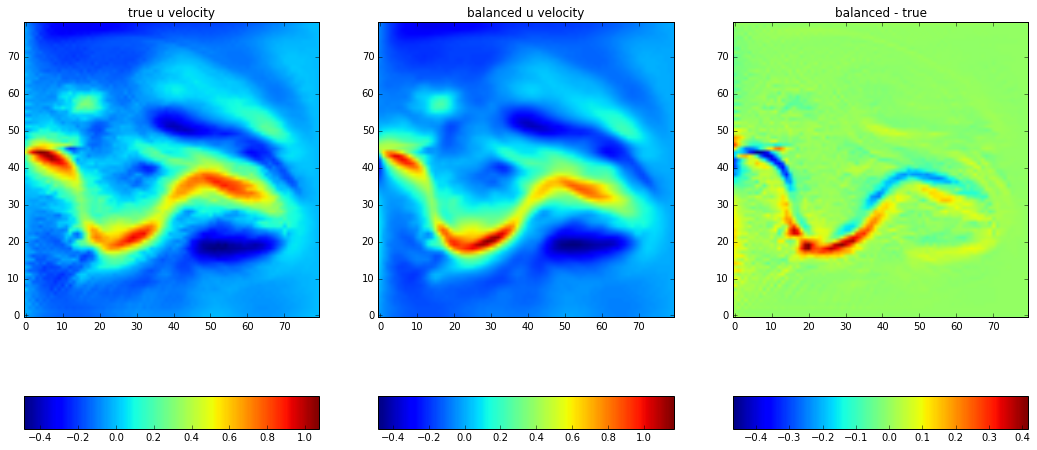

In [23]:
nfig =3
t=1
im=range(0,nfig)
titres=['true u velocity','balanced u velocity','balanced - true']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(uphyt[t,:,:])
im[1] = ax[1].imshow(uphyb[t,:,:])
im[2] = ax[2].imshow((uphyb[t,:,:]-uphyt[t,:,:]))
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
#im[2].set_clim(-0.5,0.5)
plt.show()
fig.savefig('./fig/u_bal_true.png')



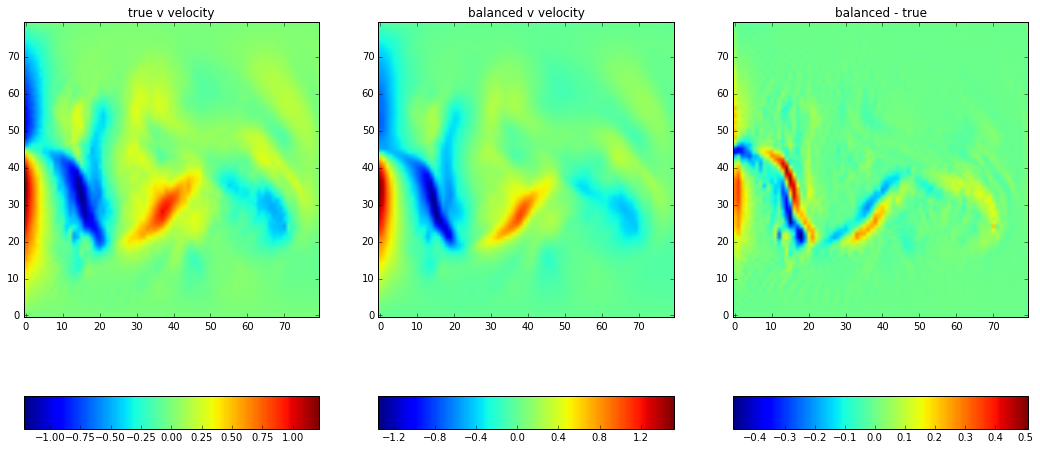

In [24]:
nfig =3
t=1
im=range(0,nfig)
titres=['true v velocity','balanced v velocity','balanced - true']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(vphyt[t,:,:])
im[1] = ax[1].imshow(vphyb[t,:,:])
im[2] = ax[2].imshow((vphyb[t,:,:]-vphyt[t,:,:]))
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
#im[2].set_clim(-0.5,0.5)
plt.show()
fig.savefig('./fig/v_bal_true.png')



### Comparison

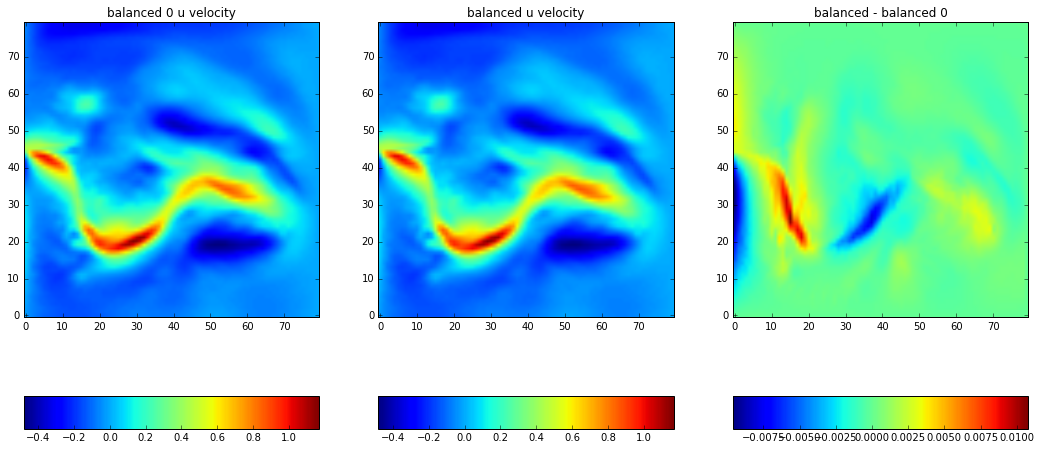

In [25]:
nfig =3
t=1
im=range(0,nfig)
titres=['balanced 0 u velocity','balanced u velocity','balanced - balanced 0']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(uphyb0[t,:,:])
im[1] = ax[1].imshow(uphyb[t,:,:])
im[2] = ax[2].imshow((uphyb[t,:,:]-uphyb0[t,:,:]))
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
#im[2].set_clim(-0.5,0.5)
plt.show()
fig.savefig('./fig/u_bal_bal0.png')



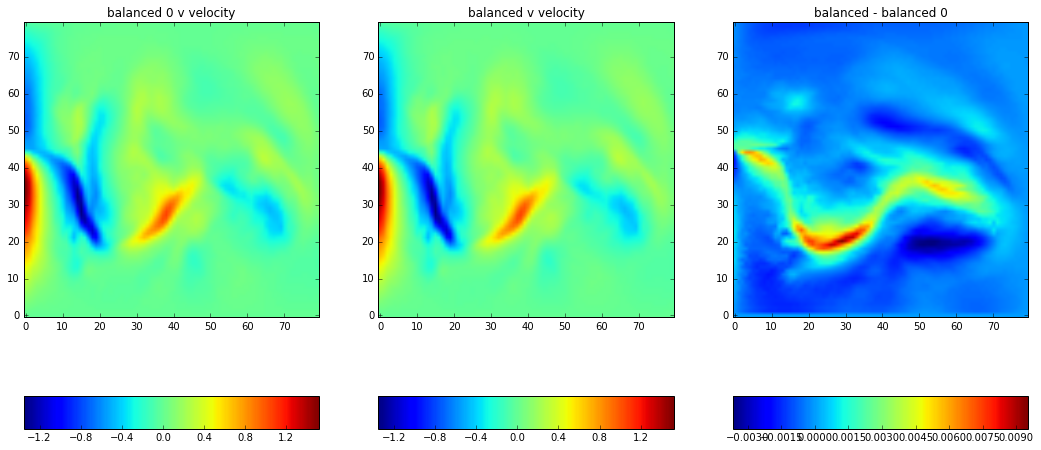

In [26]:
nfig =3
t=1
im=range(0,nfig)
titres=['balanced 0 v velocity','balanced v velocity','balanced - balanced 0']
fig, ax = plt.subplots(ncols=nfig)
im[0] = ax[0].imshow(vphyb0[t,:,:])
im[1] = ax[1].imshow(vphyb[t,:,:])
im[2] = ax[2].imshow((vphyb[t,:,:]-vphyb0[t,:,:]))
plt.subplots_adjust(bottom=0.2)
for k in range(0,len(im)):
    pos = ax[k].get_position()
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    plt.colorbar(im[k],orientation='horizontal',cax=cbar_ax)
    ax[k].set_title(titres[k])
    ax[k].invert_yaxis()
#im[2].set_clim(-0.5,0.5)
plt.show()
fig.savefig('./fig/v_bal_bal0.png')



In [ ]:
SZ=np.shape(hfilt)
YA2 = SZ[1]
j = 1
i = 20
if j<YA2-1:
    hep = hfilt[1,j+1,i]
    hpp = hfilt[1,j+1,i+1]
else:
    hep = 0
    hpp = 0
hee=hfilt[1,j,i]
hpe=hfilt[1,j,i+1]

if j==0:
    hem=hfilt[1,j-1,i]
    hpm=hfilt[1,j-1,i+1]
else:
    hem=0
    hpm=0
print 'hij+1=',hep
print 'hi+1j+1=',hpp
print 'hij=',hee
print 'hi+1j=',hpe
print 'hij-1=',hem
print 'hi+1j-1=',hpm
if j == YA2-1:
    c1 = 0.5*2
    c2 = 0.25*2
elif j == 0:
    c1 = 0.25*2
    c2 = 0.5*2
else:
    c1 = 0.25
    c2 = 0.25

dh = c1 * (hep + hpp + hee + hpe) - c2 * (hee + hpe + hem + hpm)
print 'dh=',dh
print c1
plt.plot([-1,0,1],[hem,hee,hep])
plt.plot([-1,0,1],[hpm,hpe,hpp])
uest = - (grav/fcor[j])*dh/dy
print 'uij=',uphyt[1,j,i]
print 'uest=',uest
print 'uijb=',uphyb[1,j,i]
